In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["SimHei"]

In [8]:
data=pd.read_csv('./data/eth_data.csv')

In [9]:
data.head()

,t,o,h,l,c,v,qv
0,1735689600000,3336.58,3337.28,3334.76,3337.25,1138.373,3.797686e+06
1,1735689660000,3337.25,3338.41,3336.48,3338.40,708.214,2.363459e+06
2,1735689720000,3338.40,3341.86,3338.05,3341.86,1947.567,6.505307e+06
3,1735689780000,3341.86,3341.87,3338.22,3339.50,671.721,2.243730e+06
4,1735689840000,3339.50,3341.56,3339.12,3339.41,532.730,1.779639e+06


In [10]:
data.columns

Index(['t', 'o', 'h', 'l', 'c', 'v', 'qv'], dtype='object')

In [11]:
cur_data=data[-3000:]

In [12]:
cur_data.to_csv('./data/min_eth_data.csv',index=False)

In [7]:
def analyze_feature_trends(df,feature_columns,train_idx,val_idx,test_idx):
    plt.figure(figsize=(15,10))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(len(feature_columns), 1, i)
        plt.plot(df.index,df[col])
        plt.title(f"Feature:{col} - 趋势")
        plt.tight_layout()
    plt.show()

    # 计算个特征在不同时间段的均值变化
    train_mean = df.iloc[train_idx][feature_columns].mean()
    val_mean = df.iloc[val_idx][feature_columns].mean()
    test_mean = df.iloc[test_idx][feature_columns].mean()
    mean_df = pd.DataFrame([train_mean, val_mean, test_mean], index=['train', 'val', 'test'])
    print("各特征在不同数据集的均值变化:\n", mean_df.T)

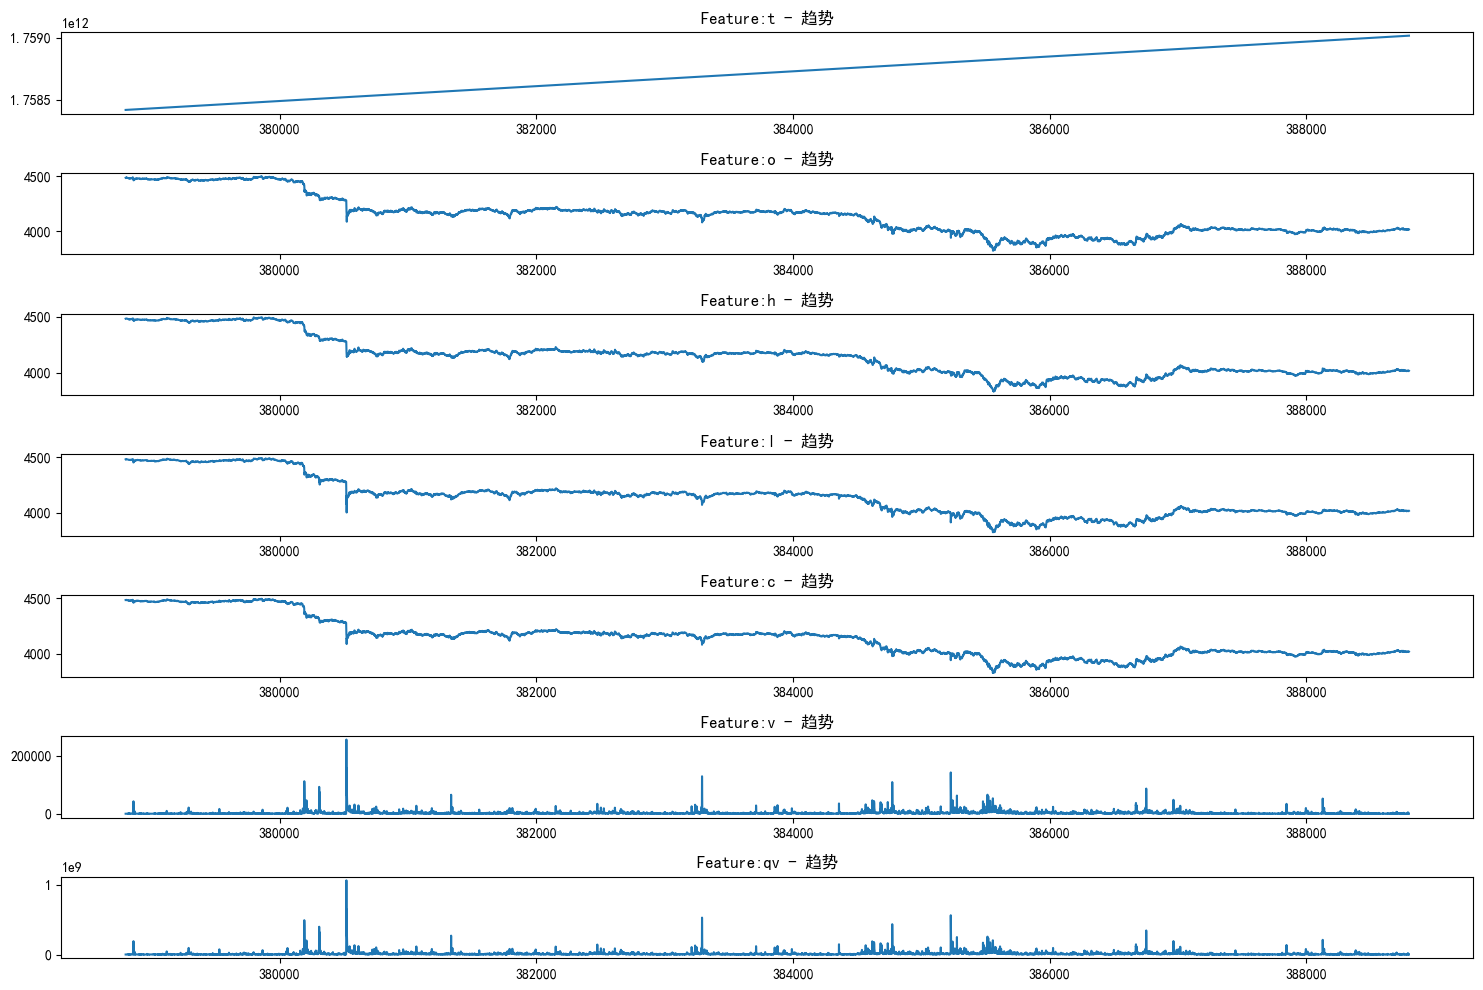

各特征在不同数据集的均值变化:
           train           val          test
0  2.512636e+11  2.512132e+11  2.512202e+11


In [8]:
test_size=0.2
val_size=0.1
total_len = len(cur_data)
test_len = int(total_len * test_size)
val_len = int(total_len * val_size)
train_len = total_len - val_len - test_len
target_column = 'c_pred'  # 目标价格列
feature_columns = [col for col in cur_data.columns if col != target_column]  # 特征列
analyze_feature_trends(cur_data,feature_columns,train_len,val_len,test_len)